<center>

<img src="https://www.infnet.edu.br/infnet/wp-content/uploads/sites/18/2021/10/infnet-30-horizontal-padrao@300x-8-1024x265.png" width="60%"/>
</center>

---

# Algoritmos de Inteligência Artificial para clusterização [25E4_2]
## MIT em Inteligência Artificial, Machine Learning e Deep Learning em Data Science

---


## Análise de agrupamentos



A **análise de agrupamentos** representa um conjunto de técnicas exploratórias muito úteis e que podem ser aplicadas quando há a intenção de se verificar a existência de comportamentos semelhantes entre observações  em relação a determina das variáveis e o objetivo de se criarem grupos, ou clusters,
em que prevaleça a homogeneidade interna.

A análise de conglomerados ou análise de clusters, tem por objetivo principal a alocação de observações em uma quantidade relativamente pequena de agrupamentos homogêneos internamente e heterogêneos entre si e que representem o comportamento conjunto das observações a partir de determinadas variáveis.

A lógica a partir da qual a análise de agrupamentos pode ser elaborada, consiste em:

- Definição das medidas de distância ou de semelhança.
- Definição do esquema de aglomeração.

## Análise Hierárquicos



Os esquemas de aglomeração hierárquicos podem ser aglomerativos ou divisivos, dependendo do modo como é iniciado o processo. Caso todas as observações sejam consideradas separadas e, a partir de suas distâncias (ou semelhanças), sejam formados grupos até que se chegue a um estágio final com apenas um agrupamento,
então esse processo é conhecido como aglomerativo.

Dentre os esquemas hierárquicos aglomerativos, temos:

- Método de encadeamento do tipo único (nearest neighbor ou single linkage),
- Completo (furthest neighbor ou complete linkage),
- Médio (between groups ou average linkage).

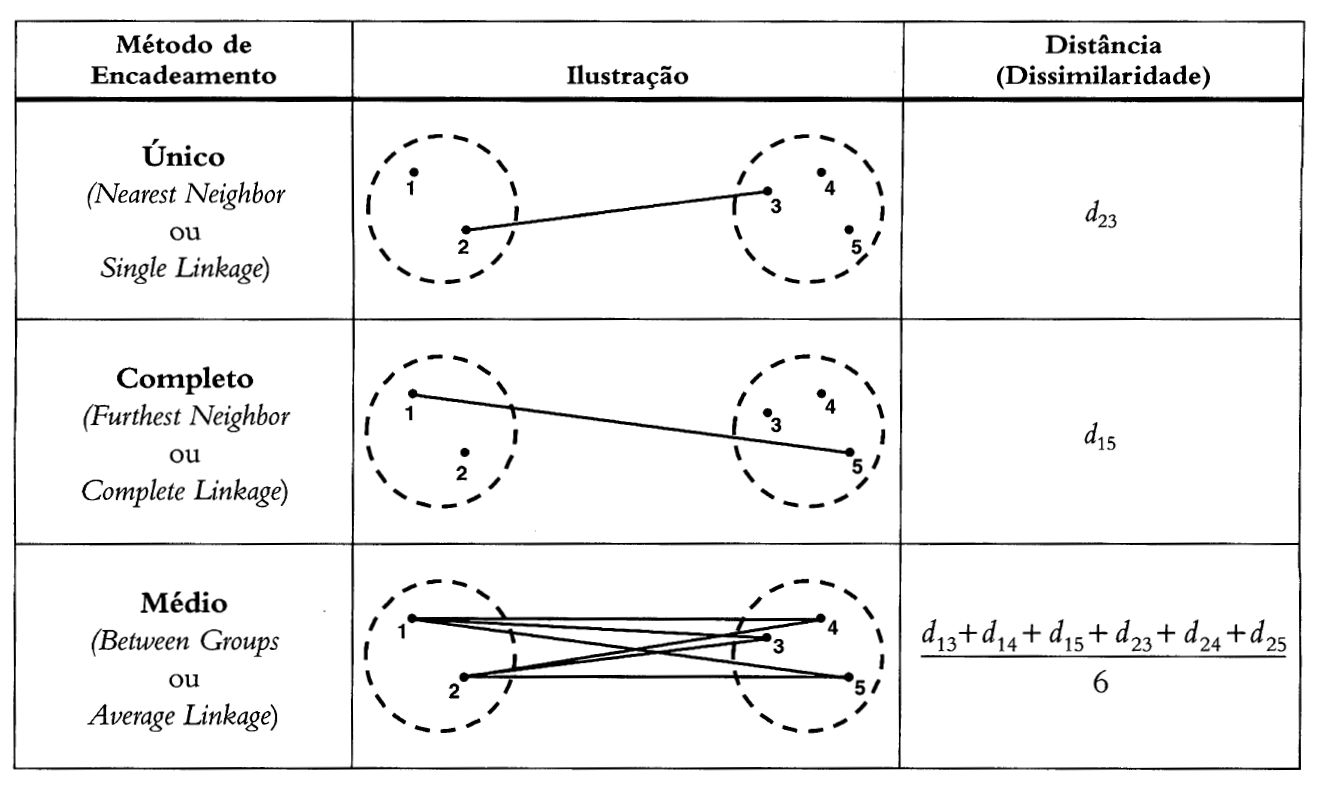

O método de encadeamento único privilegia as menores distâncias (daí vem a nomenclatura nearest neighbor) para que sejam formados novos agrupamentos a cada estágio de aglomeração pela incorporação de observações ou grupos. Nesse sentido, sua aplicação é recomendável para os casos em que as observações sejam
relativamente afastadas, isto é, diferentes, e deseja-se formar agrupamentos levando-se em consideração um núnimo de homogeneidade. Por outro lado, sua análise fica prejudicada quando da existência de observações ou agrupamentos pouco afastados entre si.


Já o método de encadeamento completo vai em direção contrária, ou seja, privilegia as maiores distâncias entre as observações ou grupos para que sejam formados novos agrupamentos (daí, a nomenclaturafurthest neighbor) e, dessa maneira, sua adoção é recomendável para os casos em que não exista considerável afastamento entre as observações e a necessidade de identificar heterogeneidades entre elas.


No método de encadeamento médio dois grupos sofrem fusão com base na distância média entre todos os pares de observações pertencentes a esses grupos (daí, a nomenclatura average línkage). Dessa forma, embora ocorram alterações no cálculo das medidas de distância entre os agrupamentos, o método de encadeamento
médio acaba por preservar a solução de ordenamento das observações em cada grupo, oferecida pelo método de encadeamento único, caso haja um considerável afastamento entre as observações.

### Exemplo prático de análise de agrupamentos com esquemas de aglomeração hierárquicos

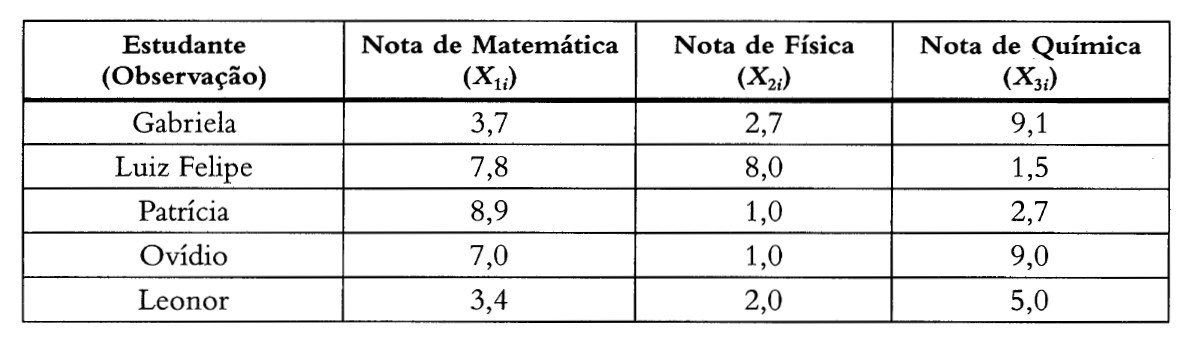

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('Versao do Numpy:', np.__version__)
print('Versao do Pandas:', pd.__version__)
print('Versao do Matplotlib:', plt.matplotlib.__version__)
print('Versao do Seaborn:', sns.__version__)

Versao do Numpy: 2.0.2
Versao do Pandas: 2.2.2
Versao do Matplotlib: 3.10.0
Versao do Seaborn: 0.13.2


In [3]:
dados = {
  'estudante' : ['Gabriela', 'Luiz Felipe', 'Patricia', 'Ovidio', 'Leonor'],
  'matematica' : [3.7, 7.8, 8.9, 7.0, 3.4],
  'fisica': [2.7, 8.0, 1.0, 1.0, 2.0],
  'quimica': [9.1, 1.5, 2.7, 9.0, 5.0]
}

df = pd.DataFrame(dados)
df

,estudante,matematica,fisica,quimica
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patricia,8.9,1.0,2.7
3,Ovidio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


In [4]:
import plotly.express as px

In [5]:
px.scatter_3d(df, x='matematica', y='fisica', z='quimica', text='estudante')

In [6]:
notas_matematica = df.iloc[:, 1].values #df['matematica'].values
notas_fisica = df.iloc[:, 2].values
notas_quimica = df.iloc[:, 3].values

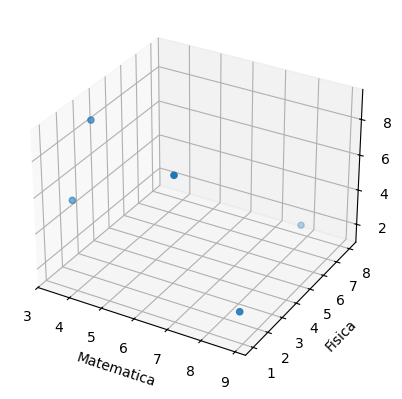

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(notas_matematica, notas_fisica, notas_quimica)

ax.set_xlabel('Matematica')
ax.set_ylabel('Fisica')
ax.set_zlabel('Quimica')

plt.show()

### Método de encadeamento único (nearest neighbor ou single linkage)

Inicialmente, definimos a matriz $D_0$, composta pelas distâncias euclidianas (dissirnilaridades) entre cada par de observações.

In [9]:
from math import dist

In [10]:
distance_matrix_0 = []
for i in range(df.shape[0]): #linha da matriz
  distances = []
  for j in range(df.shape[0]):
    if i > j:
      distance = dist(df.iloc[i, 1:], df.iloc[j, 1:])
    else:
      distance = 0
    distances.append(round(distance, 3))
  distance_matrix_0.append(distances)

distance_matrix_0

[[0, 0, 0, 0, 0],
 [10.132, 0, 0, 0, 0],
 [8.42, 7.187, 0, 0, 0],
 [3.713, 10.29, 6.58, 0, 0],
 [4.17, 8.223, 6.045, 5.474, 0]]

In [11]:
from sklearn.metrics import pairwise_distances

In [12]:
dm_sk = pairwise_distances(df.iloc[:, 1:], metric='euclidean')
dm_sk

array([[ 0.        , 10.13212712,  8.41961994,  3.71348893,  4.17013189],
       [10.13212712,  0.        ,  7.18679344, 10.29028668,  8.22253002],
       [ 8.41961994,  7.18679344,  0.        ,  6.58027355,  6.0448325 ],
       [ 3.71348893, 10.29028668,  6.58027355,  0.        ,  5.47357287],
       [ 4.17013189,  8.22253002,  6.0448325 ,  5.47357287,  0.        ]])

In [13]:
from scipy.cluster import hierarchy

In [14]:
single_linkage = hierarchy.linkage(
    df.iloc[:, 1:],
    method='single',
    metric='euclidean'
)
single_linkage

array([[0.        , 3.        , 3.71348893, 2.        ],
       [4.        , 5.        , 4.17013189, 3.        ],
       [2.        , 6.        , 6.0448325 , 4.        ],
       [1.        , 7.        , 7.18679344, 5.        ]])

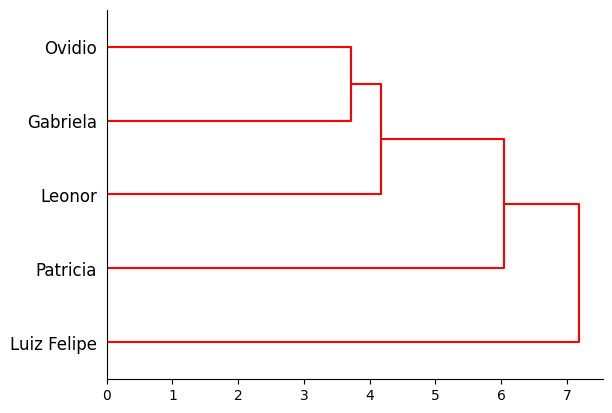

In [18]:
f, ax = plt.subplots()

hierarchy.dendrogram(
    single_linkage,
    labels=df['estudante'].values,
    ax=ax,
    orientation='right',
    above_threshold_color='red',
    distance_sort=True,
    color_threshold=0.5
)

sns.despine()
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
cluster_single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single', metric='euclidean')
cluster_single_linkage.fit(df.iloc[:, 1:])

AgglomerativeClustering(linkage='single', n_clusters=3)

In [21]:
df['cluster_single_linkage'] = cluster_single_linkage.labels_
df

,estudante,matematica,fisica,quimica,cluster_single_linkage
0,Gabriela,3.7,2.7,9.1,0
1,Luiz Felipe,7.8,8.0,1.5,1
2,Patricia,8.9,1.0,2.7,2
3,Ovidio,7.0,1.0,9.0,0
4,Leonor,3.4,2.0,5.0,0


In [22]:
px.scatter_3d(df, x='matematica', y='fisica', z='quimica', color='cluster_single_linkage', text='estudante')

In [23]:
single_linkage

array([[0.        , 3.        , 3.71348893, 2.        ],
       [4.        , 5.        , 4.17013189, 3.        ],
       [2.        , 6.        , 6.0448325 , 4.        ],
       [1.        , 7.        , 7.18679344, 5.        ]])

In [24]:
complete_linkage = hierarchy.linkage(
    df.iloc[:, 1:],
    method='complete',
    metric='euclidean'
)
complete_linkage

array([[ 0.        ,  3.        ,  3.71348893,  2.        ],
       [ 4.        ,  5.        ,  5.47357287,  3.        ],
       [ 1.        ,  2.        ,  7.25603197,  2.        ],
       [ 6.        ,  7.        , 10.33876201,  5.        ]])

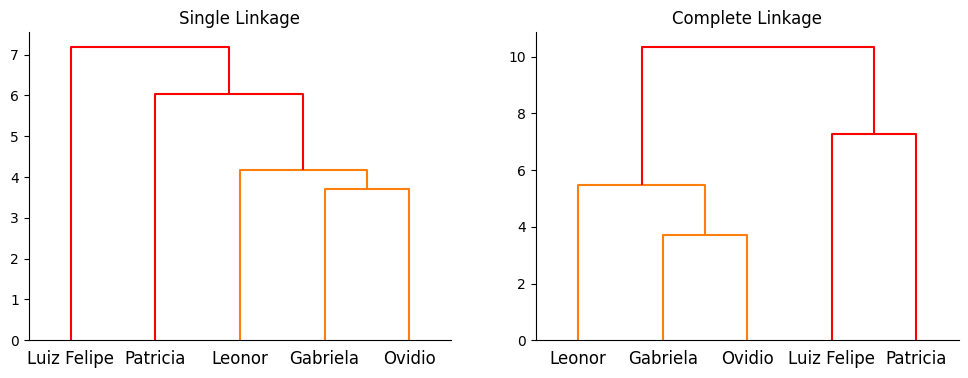

In [25]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))

hierarchy.dendrogram(
    single_linkage,
    labels=df['estudante'].values,
    distance_sort=True,
    above_threshold_color='red',
    ax=ax[0],

)

hierarchy.dendrogram(
    complete_linkage,
    labels=df['estudante'].values,
    distance_sort=True,
    above_threshold_color='red',
    ax=ax[1],

)

ax[0].set_title('Single Linkage')
ax[1].set_title('Complete Linkage')

sns.despine()
plt.show()


#### Exemplo com Dataset Iris

In [26]:
from sklearn.datasets import load_iris

In [38]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:


iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].apply(lambda x: iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


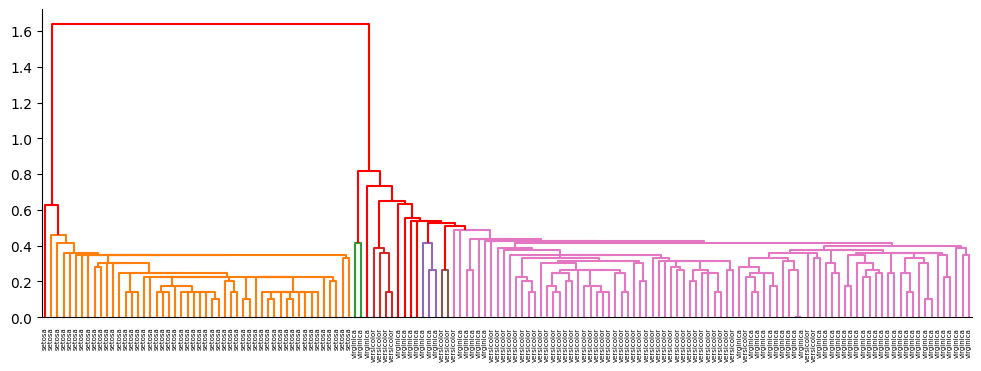

In [43]:
iris_single_linkage = hierarchy.linkage(
    iris_df.iloc[:, :-1],
    method='single',
    metric='euclidean'
)

f, ax = plt.subplots(figsize=(12, 4))

hierarchy.dendrogram(
    iris_single_linkage,
    above_threshold_color='red',
    labels=iris_df['target'].values,
    distance_sort=True,
    color_threshold=0.5
)

sns.despine()
plt.show()

## Analisando um conjunto de dados "complexo"

In [44]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [45]:
from sklearn.datasets import make_moons

In [46]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

moon_df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))
moon_df.head()

,x,y,label
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


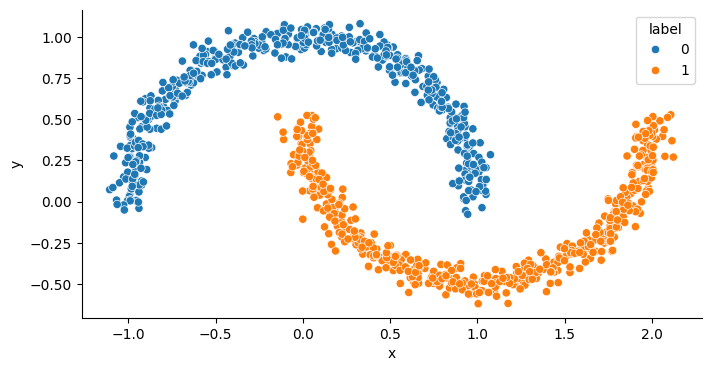

In [48]:
f, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(data=moon_df, x='x', y='y', hue='label', ax=ax)
sns.despine()
plt.show()

In [49]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
moon_df['kmeans'] = kmeans.labels_

ward = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
moon_df['ward'] = ward.labels_

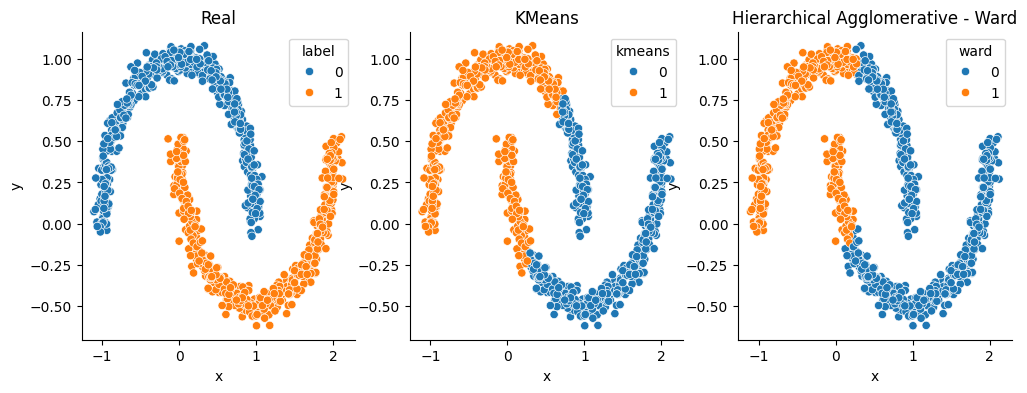

In [51]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.scatterplot(data=moon_df, x='x', y='y', hue='label', ax=ax[0])
sns.scatterplot(data=moon_df, x='x', y='y', hue='kmeans', ax=ax[1])
sns.scatterplot(data=moon_df, x='x', y='y', hue='ward', ax=ax[2])

ax[0].set_title('Real')
ax[1].set_title('KMeans')
ax[2].set_title('Hierarchical Agglomerative - Ward')

sns.despine()
plt.show()